In [12]:
import os
import sys
from datetime import datetime
import numpy as np
import xarray as xr
import pandas as pd
from skimage.segmentation import flood, flood_fill
import matplotlib.pyplot as plt
import dask
from dask.diagnostics import ProgressBar
from dask_jobqueue import PBSCluster

import src
from src import utils
from src.data import loading
from src.attrs import PATHS, GLOBALS

# Full suite
VARIABLES = ['SSH', 'zos', 'SST', 'MLD', 'PSL', 'UBOT', 'VBOT']
START_TIME = datetime.now()

In [19]:
# Get dynamic sea level
zos = loading.load_anomalies('zos', 1251, '011')
north_pacific = zos.isel(time=0).sel(lat=slice(-20,60), lon=slice(115,300))
north_pacific_rectangle = xr.where(~np.isnan(north_pacific), 1, 0)

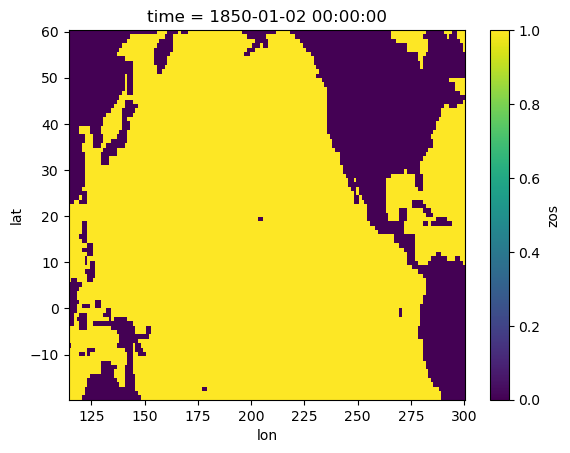

In [21]:
north_pacific_rectangle.plot()

In [31]:
# Apply flood fill
north_pacific_mask[20, 0:15] = 0
stencil = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

north_pacific_mask = flood_fill(north_pacific_rectangle.values, (40,40), 2, footprint=stencil)
north_pacific_mask = np.where(north_pacific_mask == 2, 1, 0)

north_pacific_mask = xr.DataArray(
    north_pacific_mask,
    dims=north_pacific_rectangle.dims,
    coords=north_pacific_rectangle.coords
)
north_pacific_mask = north_pacific_mask.drop_vars('time')

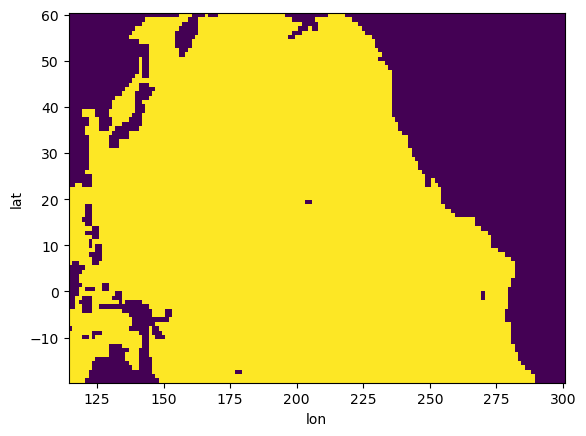

In [32]:
north_pacific_mask.plot(add_colorbar=False)

In [33]:
north_pacific_mask.name = 'mask'
north_pacific_mask.attrs['long_name'] = 'north_pacific_mask'

In [34]:
north_pacific_mask.to_netcdf(os.path.join(PATHS['grid'], 'north_pacific_mask.nc'))
